# Bagian Baru

**TUGAS UAS AI**

> Nama : Sandy Irawan

> NIM : 1955201056

> Kelas : 7A2







In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
path = './gaji.csv'
df = pd.read_csv(path)
df

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
gaji = df['Gaji']
gaji_above_80k = df[(df['Gaji'] > 80000)]
gaji_under_80k = df[(df['Gaji'] <= 80000)]

print(gaji_above_80k, '\n')
print(gaji_under_80k)
print(np.array(gaji > 80000))

            Posisi  Level     Gaji
4  Country Manager      5   110000
5   Region Manager      6   150000
6          Partner      7   200000
7   Senior Partner      8   300000
8          C-level      9   500000
9              CEO     10  1000000 

              Posisi  Level   Gaji
0   Business Analyst      1  45000
1  Junior Consultant      2  50000
2  Senior Consultant      3  60000
3            Manager      4  80000
[False False False False  True  True  True  True  True  True]


In [5]:
df.insert(3, "Bool", np.array(gaji > 80000), True)
df

,Posisi,Level,Gaji,Bool
0,Business Analyst,1,45000,False
1,Junior Consultant,2,50000,False
2,Senior Consultant,3,60000,False
3,Manager,4,80000,False
4,Country Manager,5,110000,True
5,Region Manager,6,150000,True
6,Partner,7,200000,True
7,Senior Partner,8,300000,True
8,C-level,9,500000,True
9,CEO,10,1000000,True


In [6]:
probX = gaji_above_80k['Gaji'].count() / gaji.count()
probY = gaji_under_80k['Gaji'].count() / gaji.count()

print('Gaji > 80K  : ', probX)
print('Gaji >= 80K : ', probY)

Gaji > 80K  :  0.6
Gaji >= 80K :  0.4


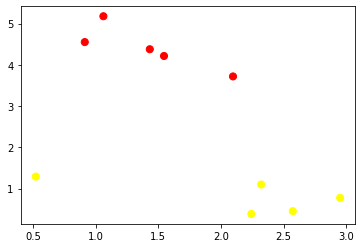

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=gaji.count(), centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

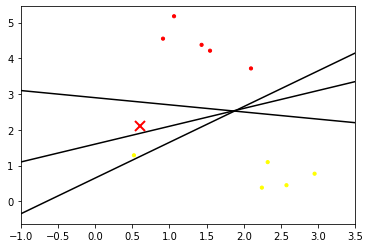

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=gaji.count(), cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

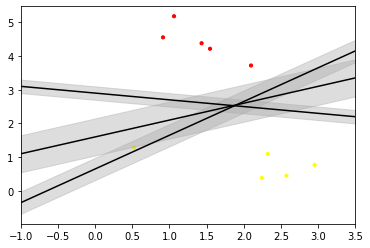

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=gaji.count(), cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [10]:
X = df[['Gaji','Level','Bool']]
y = df['Posisi']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:

from sklearn import svm

classifier = svm.SVC(kernel = 'linear')
 

classifier.fit(X_train, y_train)
 

y_predict = classifier.predict(X_test)
 

print(classification_report(y_test, y_predict))

                   precision    recall  f1-score   support

 Business Analyst       0.00      0.00      0.00       1.0
Junior Consultant       0.00      0.00      0.00       1.0
Senior Consultant       0.00      0.00      0.00       0.0

         accuracy                           0.00       2.0
        macro avg       0.00      0.00      0.00       2.0
     weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

Text(69.0, 0.5, 'Truth')

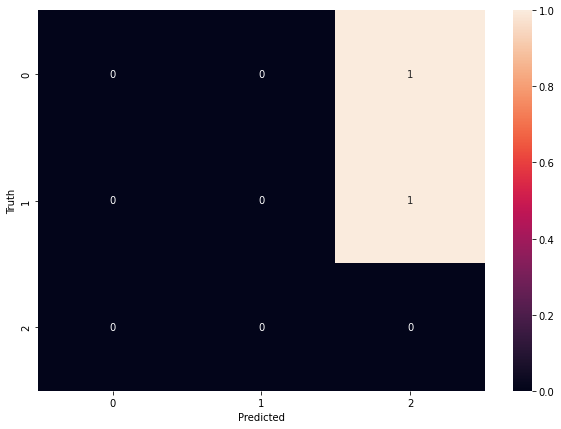

In [13]:
cm = confusion_matrix(y_test, y_predict)
 
%matplotlib inline
plt.figure (figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')